In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# campaigns = pd.read_csv("../data/fpa/campaigns_fpa_filtered_final.csv")
# campaigns["logical_category"]

0       1.38
1       2.35
2       5.26
3       2.35
4       1.21
        ... 
9635    5.26
9636    5.37
9637    5.26
9638    3.30
9639    3.90
Name: logical_category, Length: 9640, dtype: float64

/var/folders/h0/trvv8z394996dlnpplvsqfb80000gn/T/ipykernel_13944/3334069754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


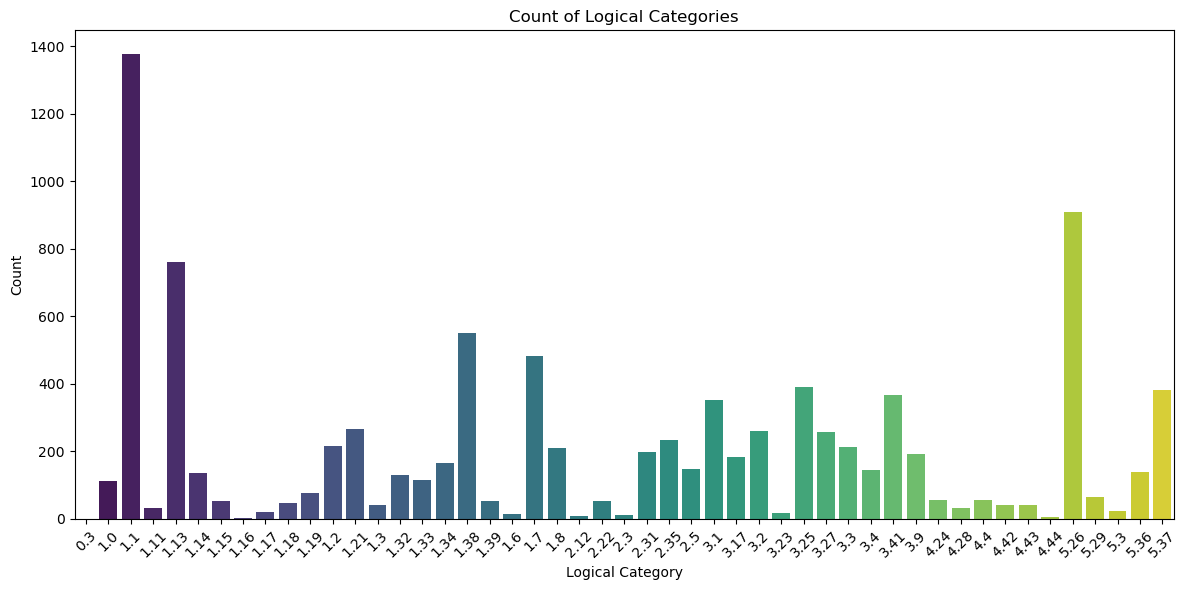

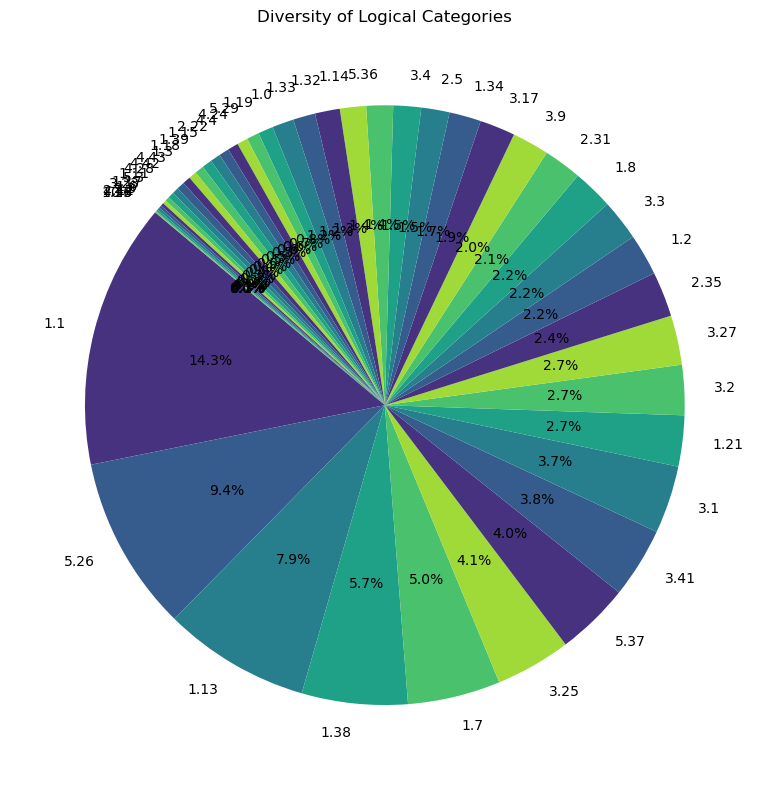

In [3]:
# category_counts = campaigns["logical_category"].value_counts()

# # Bar plot
# plt.figure(figsize=(12, 6))
# sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
# plt.title('Count of Logical Categories')
# plt.xlabel('Logical Category')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # Pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
# plt.title('Diversity of Logical Categories')
# plt.tight_layout()
# plt.show()


In [4]:
# import pandas as pd
# import plotly.express as px

# # Load the data
# campaigns = pd.read_csv("../data/fpa/campaigns_fpa_filtered_final.csv")

# # Split the logical_category into two parts: A and B
# categories_split = campaigns['logical_category'].astype(str).str.split('.', expand=True)
# campaigns['A'] = categories_split[0]
# campaigns['B'] = categories_split[1]

# # Count the occurrences of each A and B combination
# category_counts = campaigns.groupby(['A', 'B']).size().reset_index(name='count')

# # Create a sunburst chart
# fig = px.sunburst(
#     category_counts,
#     path=['A', 'B'],
#     values='count',
#     title='Diversity of Logical Categories',
#     color='B',
#     color_discrete_sequence=px.colors.sequential.Viridis
# )

# # Show the plot
# fig.show()


In [5]:
print(pd.read_csv("../data/fpa/campaigns_fpa_filtered_final.csv")["logical_category"].unique().shape)
print(pd.read_csv("../data/vcg/campaigns_vcg_filtered_final.csv")["logical_category"].unique().shape)


(49,)
(19,)


In [53]:
import pandas as pd
import plotly.express as px

# Load the data
campaigns_fpa = pd.read_csv("../data/fpa/campaigns_fpa_filtered_final.csv")
campaigns_vcg = pd.read_csv("/Users/adpudovnikov/Downloads/campaigns_vcg.csv")

# Function to process the data
def process_data(campaigns, dataset_name):
    categories_split = campaigns['logical_category'].astype(str).str.split('.', expand=True)
    campaigns['A'] = categories_split[0]
    campaigns['B'] = categories_split[1]
    category_counts = campaigns.groupby(['A', 'B']).size().reset_index(name='count')
    total_counts = category_counts.groupby('A')['count'].sum().reset_index(name='total_count')
    category_counts = category_counts.merge(total_counts, on='A')
    category_counts['dataset'] = dataset_name
    return category_counts

# Process both datasets
category_counts_fpa = process_data(campaigns_fpa, 'FPA')
category_counts_vcg = process_data(campaigns_vcg, 'VCG')

# Combine the processed data
category_counts_combined = pd.concat([category_counts_fpa, category_counts_vcg], ignore_index=True)
#category_counts_combined["count"] = np.log(category_counts_combined['count'] + 1)
# Create a bubble chart
fig = px.scatter(
    category_counts_combined,
    x='A',  # Positioning categories along x-axis
    y='B',  # Positioning subcategories along y-axis
    size='count',  # Size of smaller bubbles corresponds to 'B' counts
    color='A',  # Different colors for each 'A' category
    size_max=120,  # Max size of the bubbles
    title="Hierarchical Bubble Chart of Categories (FPA and VCG)",
    labels={'A': 'Main Categories (A)', 'B': 'Subcategories (B)'},
    hover_data={'count': True, 'total_count': True, 'dataset': True},
    facet_row='dataset'  # Create separate rows for each dataset
)

# Add styling for better separation and understanding
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# Update layout for better visualization
fig.update_layout(
    height=1200,  # Increase height to accommodate both datasets
    yaxis_title="Subcategories (B)",
    yaxis2_title="Subcategories (B)",
    xaxis_title="Main Categories (A)",
    xaxis2_title="Main Categories (A)"
)

# Show the plot
fig.show()


In [67]:
import pandas as pd
import plotly.express as px

# Load the data
campaigns_fpa = pd.read_csv("../data/fpa/campaigns_fpa_filtered_final.csv")
campaigns_vcg = pd.read_csv("../data/vcg/campaigns_vcg_filtered_final.csv")

# Load the statistics data
stats_fpa = pd.read_csv("../data/fpa/stats_fpa_filtered_final.csv")
stats_vcg = pd.read_csv("../data/vcg/stats_vcg_filtered_final.csv")

# Function to process the data
def process_data(campaigns, stats, dataset_name):
    # Select only the necessary columns from stats
    stats_selected = stats[['campaign_id', 'CTRPredicts']]
    
    # Perform an inner join on campaign_id
    campaigns_with_stats = pd.merge(campaigns, stats_selected, on='campaign_id', how='inner')
    
    # Select only the necessary columns from campaigns
    campaigns_with_stats = campaigns_with_stats[['campaign_id', 'logical_category', 'auction_budget', 'CTRPredicts']]
    
    # Split the logical_category into two parts: A and B
    categories_split = campaigns_with_stats['logical_category'].astype(str).str.split('.', expand=True)
    campaigns_with_stats['A'] = categories_split[0]
    campaigns_with_stats['B'] = categories_split[1]
    
    # Calculate average auction budget for each main category A
    avg_budget = campaigns_with_stats.groupby('A')['auction_budget'].mean().reset_index(name='avg_budget')
    
    # Calculate average CTR for each main category A
    avg_ctr = campaigns_with_stats.groupby('A')['CTRPredicts'].mean().reset_index(name='avg_ctr')
    
    # Merge average budget and average CTR
    avg_stats = pd.merge(avg_budget, avg_ctr, on='A')
    
    avg_stats['dataset'] = dataset_name
    
    return avg_stats

# Process both datasets
category_counts_fpa = process_data(campaigns_fpa, stats_fpa, 'FPA')
category_counts_vcg = process_data(campaigns_vcg, stats_vcg, 'VCG')

# Combine the processed data
category_counts_combined = pd.concat([category_counts_fpa, category_counts_vcg], ignore_index=True)


In [66]:
category_counts_combined#[["A", "avg_budget", "avg_ctr"]].groupby('A').mean()

,A,avg_budget,avg_ctr
0,0,495.360000,0.024782
1,1,531.893523,0.030819
2,2,1600.125452,0.017810
3,3,1197.702939,0.053326
4,4,1780.726838,0.029657
5,5,1637.064760,0.032231
6,1,5045.264639,0.004511
7,2,18013.149135,0.734154
8,3,339916.191569,0.011652
9,4,137254.815689,0.020294


In [73]:
category_counts_combined[["A", "avg_budget", "dataset"]].groupby(["A", "dataset"]).mean().unstack().to_csv("avg_budget.csv")

In [74]:
category_counts_combined[["A", "avg_ctr", "dataset"]].groupby(["A", "dataset"]).mean().unstack().to_csv("avg_ctr.csv")

In [7]:
import pandas as pd
import plotly.express as px

# Load the data
campaigns = pd.read_csv("../data/fpa/campaigns_fpa_filtered_final.csv")

# Split the logical_category into two parts: A and B
categories_split = campaigns['logical_category'].astype(str).str.split('.', expand=True)
campaigns['A'] = categories_split[0]
campaigns['B'] = categories_split[1]

# Count the occurrences of each A and B combination
category_counts = campaigns.groupby(['A', 'B']).size().reset_index(name='count')

# Count the total number of elements in each A category
total_counts = category_counts.groupby('A')['count'].sum().reset_index(name='total_count')

# Select the top 5 A categories based on the total count
top_5_categories = total_counts.nlargest(5, 'total_count')

# Filter category_counts to include only the top 5 A categories
filtered_counts = category_counts[category_counts['A'].isin(top_5_categories['A'])]

# Merge total_counts back with filtered_counts to scale the sizes
filtered_counts = filtered_counts.merge(total_counts, on='A')

# Create a bubble chart
fig = px.scatter(
    filtered_counts,
    x='A',  # Positioning categories along x-axis
    y='B',  # Positioning subcategories along y-axis
    size='count',  # Size of smaller bubbles corresponds to 'B' counts
    color='A',  # Different colors for each 'A' category
    size_max=60,  # Max size of the bubbles
    title="Hierarchical Bubble Chart of Top 5 Categories",
    labels={'A': 'Main Categories (A)', 'B': 'Subcategories (B)'},
    hover_data={'count': True, 'total_count': True}
)

# Add styling for better separation and understanding
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# Show the plot
fig.show()

## GOOD IDEAS

In [8]:
fig = px.sunburst(
    category_counts,
    path=['A', 'B'],  # Hierarchical structure
    values='count',  # Use counts to determine segment size
    title="Sunburst Chart of Logical Categories",
    color='A',  # Use A to color the segments
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig.show()


In [9]:
fig = px.treemap(
    category_counts,
    path=['A', 'B'],  # Hierarchical levels
    values='count',  # Size based on count
    title="Treemap of Logical Categories",
    color='A',  # Color by main category
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.show()


In [10]:
fig = px.scatter(
    category_counts,
    x='A', y='B',
    size='count',  # Bubble size indicates count
    color='A',  # Use A to distinguish colors
    size_max=60,
    title="Packed Bubble Chart of Logical Categories",
    labels={'A': 'Main Categories (A)', 'B': 'Subcategories (B)'}
)
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.show()

##
## bigger x, bigger y
## add fpa to the lower part (two stage)
## 


In [11]:
fig = px.bar(
    category_counts,
    x='A', y='count',
    color='B',  # Stacked bars for subcategories
    title="Bar Chart of Logical Categories",
    labels={'A': 'Main Categories (A)', 'count': 'Counts'},
    barmode='stack'
)
fig.show()


In [12]:
import networkx as nx
import plotly.graph_objects as go

# Create a graph from the relationships
G = nx.from_pandas_edgelist(category_counts, 'A', 'B', ['count'])

# Generate positions for the nodes
pos = nx.spring_layout(G)

# Create the Plotly figure
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(width=0.5, color='#888'), hoverinfo='none')

node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y, mode='markers',
    marker=dict(size=10, color='blue'),
    text=node_text,
    hoverinfo='text'
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(title="Network Graph of Categories", showlegend=False))
fig.show()


In [13]:
fig = px.pie(
    total_counts,
    names='A',  # Use A categories
    values='total_count',  # Proportion of total count
    title="Pie Chart of Logical Categories",
    hole=0.4  # Donut chart effect
)
fig.show()


In [14]:
campaigns["platform_id"].unique().shape

KeyError: 'platform_id'

In [15]:
stats = pd.read_csv("../data/fpa/stats_fpa_filtered_final.csv")
stats.head()

,campaign_id,period,item_id,contact_price_bin,AuctionVisibilitySurplus,AuctionClicksSurplus,AuctionContactsSurplus,AuctionWinBidSurplus,CTRPredicts,CRPredicts,AuctionCount,platform_p
0,76078451,529786800,4229093900,48.0,12.077467,0.380174,0.024912,697.99,0.009644,0.075732,128,NaN
1,76230675,529790400,4012186500,42.0,10.316097,0.930837,0.041039,575.45,0.018718,0.063262,57,NaN
2,74435084,529740000,294430500,45.0,4.110070,0.406913,0.021576,438.60,0.014657,0.064971,23,[0.8095 0.0952 0.0476 0.0476]
3,76305696,529779600,625172200,54.0,1.491969,0.113333,0.005261,608.88,0.027296,0.050835,12,NaN
4,75753971,529750800,1128293800,49.0,10.825819,0.547245,0.068645,1186.21,0.015572,0.144971,72,NaN
